In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_feature = 10000
maxlen = 100
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_feature)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequnces')

print('Pad sequnces (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequnces
Pad sequnces (sample x time)
input_train shape: (25000, 100)
input_test shape: (25000, 100)


In [4]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_feature, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 7s 31ms/step - loss: 0.5981 - acc: 0.6605 - val_loss: 0.4440 - val_acc: 0.8016
Epoch 2/10
157/157 [==============================] - 4s 23ms/step - loss: 0.3683 - acc: 0.8471 - val_loss: 0.4302 - val_acc: 0.8084
Epoch 3/10
157/157 [==============================] - 4s 23ms/step - loss: 0.2744 - acc: 0.8910 - val_loss: 0.6424 - val_acc: 0.7874
Epoch 4/10
157/157 [==============================] - 4s 24ms/step - loss: 0.2103 - acc: 0.9208 - val_loss: 0.4339 - val_acc: 0.8112
Epoch 5/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1523 - acc: 0.9474 - val_loss: 0.4515 - val_acc: 0.8176
Epoch 6/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1025 - acc: 0.9657 - val_loss: 0.4714 - val_acc: 0.8146
Epoch 7/10
157/157 [==============================] - 4s 27ms/step - loss: 0.0588 - acc: 0.9827 - val_loss: 0.6000 - val_acc: 0.7990
Epoch 8/10
157/157 [==============================] - 4s 27ms/step - 

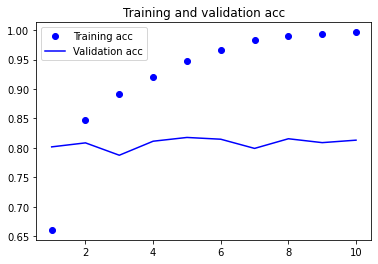

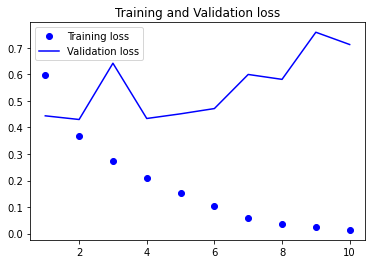

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()